# Czesc tutorialowa z Kodilli

In [2]:
import numpy as np
import pandas as pd
import string
import nltk
import itertools
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

C:\Users\wikto\AppData\Local\Temp\ipykernel_21204\1996902043.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
print(spam_dataset['Spam'].value_counts(normalize=True))

Spam
0    0.865937
1    0.134063
Name: proportion, dtype: float64


In [5]:
def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned
spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_puncation(x))
spam_dataset

,Spam,Text,Cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [6]:
import nltk

# Download the correct resource
nltk.download('punkt')  # This downloads the general punkt tokenizer

# If the above doesn't work, try this specific download
try:
    nltk.download('punkt_tab')
except:
    # Fallback to downloading all popular packages which includes punkt
    nltk.download('popular')

def tokenize(text):
    # Usunięcie wielkich liter
    clean_text = text.lower()
    
    # Tokenizacja
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords = nltk.corpus.stopwords.words("english")

In [10]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


In [12]:
stemmer = nltk.PorterStemmer()
def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words
spam_dataset['Stemmed_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: stemming(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


In [15]:
words_spam = list(spam_dataset.loc[spam_dataset['Spam']==1, 'Lemmatized_Text'].values)
words_spam = list(itertools.chain.from_iterable(words_spam))
words_spam = ' '.join(words_spam)
words_notspam = list(spam_dataset.loc[spam_dataset['Spam']==0, 'Lemmatized_Text'].values)
words_notspam = list(itertools.chain.from_iterable(words_notspam))
words_notspam = ' '.join(words_notspam)

In [16]:
words_spam

'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darling 3 week word back id like fun still tb ok xxx std chgs send å£150 rcv winner valued network customer selected receivea å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent 1 week free membership å£100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txtì¼120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged å£5month please confi

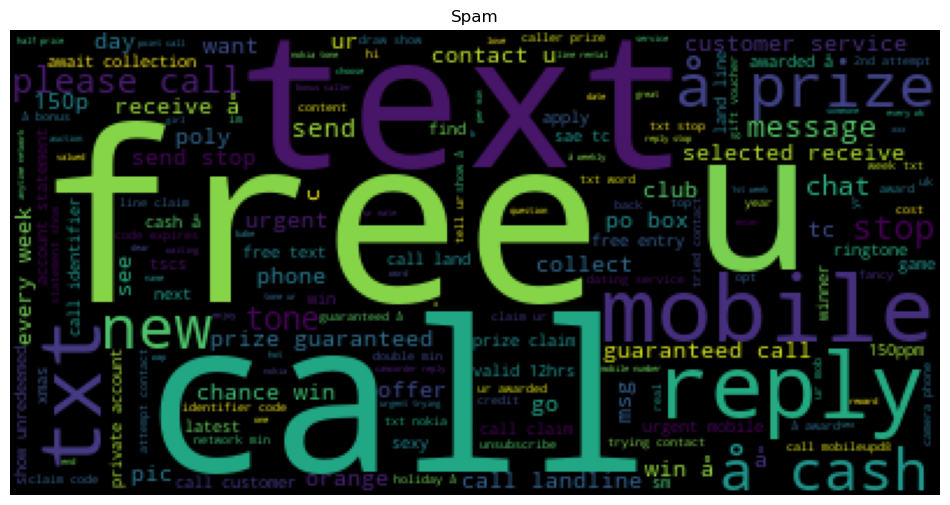

In [17]:
wordcloud = WordCloud().generate(words_spam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Spam')
plt.show()

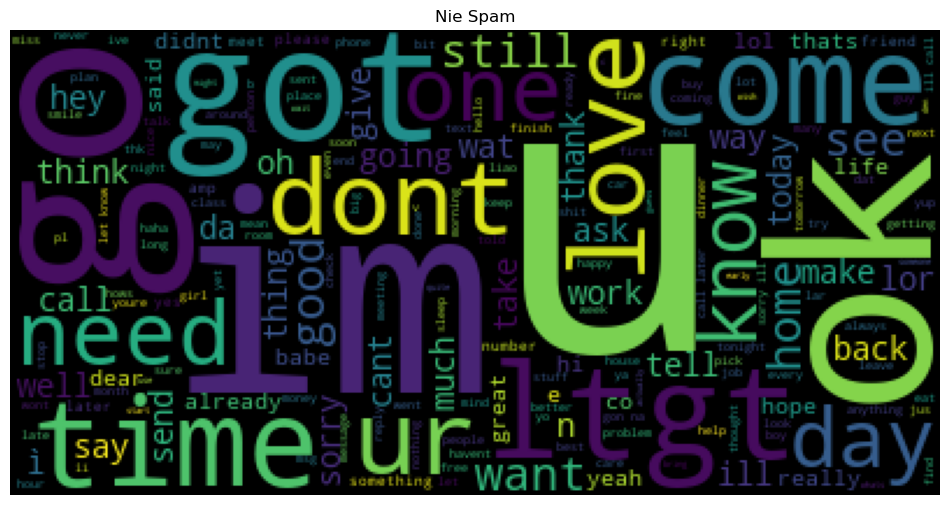

In [18]:
wordcloud = WordCloud().generate(words_notspam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Nie Spam')
plt.show()

In [19]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
print(X.shape)
y = spam_dataset['Spam']
print(y.shape)

(5572, 8843)
(5572,)


In [20]:
print(X[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.8659368269921034

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=0.01, max_df=0.5)
X_count = count.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
X_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15648 stored elements and shape (5572, 129)>

In [23]:
clf_v2 = RandomForestClassifier(max_depth=2, random_state=0)
clf_v2.fit(X_count, y)
clf_v2.score(X_count, y)

0.8695262024407753

In [24]:
tfidf = TfidfVectorizer(ngram_range=(2, 2), max_df=0.5, min_df=0.001, use_idf=True)

X = tfidf.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))

In [25]:
print(X.toarray()[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [26]:
# Get the vocabulary (feature names)
feature_names = tfidf.get_feature_names_out()

# Print the vocabulary
print(feature_names)

# Print vocabulary size
print(f"Vocabulary size: {len(feature_names)}")

# To see what bigrams are in a specific document
doc_index = 6  # Your document with all zeros
doc_features = X[doc_index].nonzero()[1]
print(f"Bigrams in document {doc_index}:")
for feature_idx in doc_features:
    print(f"{feature_names[feature_idx]}")

['08707509020 20p' '09050090044 toclaim' '100 free' '100 weekly'
 '1000 cash' '10000 cash' '10p per' '12hrs 150ppm' '1327 croydon'
 '150 worth' '150pm max10mins' '1st week' '2000 bonus' '2000 prize'
 '2003 account' '20p per' '250 cash' '2nd attempt' '2nd time' '300 sub'
 '3030 valid' '350 award' '36504 w45wq' '40gb ipod' '500 cd' '500 free'
 '500 pound' '5000 await' '5000 cash' '5000 prize' '750 anytime'
 '800 prize' '800 unredeemed' '85023 savamob' '86688 150pmsg' '900 prize'
 'account statement' 'across sea' 'admirer looking' 'aight ill'
 'anything lor' 'anytime network' 'attempt contact' 'await collection'
 'award call' 'awarded 2000' 'awarded sipix' 'babe love' 'birthday wish'
 'bonus caller' 'box 1327' 'call 08000930705' 'call 08707509020'
 'call 08712460324' 'call 09050090044' 'call back' 'call customer'
 'call free' 'call landline' 'call later' 'call mobile' 'call mobileupd8'
 'call sir' 'caller prize' 'camcorder reply' 'camera call' 'camera mobile'
 'camera phone' 'cant get' 'c

In [27]:
# View the original text of document 6
print(spam_dataset['Lemmatized_Text'][6])

# If you want to see it before lemmatization (if available)
if 'Text' in spam_dataset.columns:
    print(spam_dataset['Text'][6])

['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
Even my brother is not like to speak with me. They treat me like aids patent.


In [28]:
from sklearn.model_selection import train_test_split

# Zadanie 17.2 (Random Forest)

## Trenowanie Random Forest (pierwszy model)

In [31]:
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # podzielenie X na zbior treningowy i testowy

In [32]:
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train_old.shape[0], X_test_old.shape[0]))

Treningowe obserwacje: 4457
Testowe obserwacje: 1115


In [33]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_old, y_train_old)

RandomForestClassifier(random_state=42)

In [34]:
predictions_rf = model_rf.predict(X_test_old)

In [35]:
print('Predicted labels: ', predictions_rf[:5], predictions_rf[-5:])
print('Actual labels:    ' , y_test_old[:5].values, y_test_old[-5:].values)

Predicted labels:  [0 0 0 1 0] [0 0 0 0 0]
Actual labels:     [0 0 0 1 0] [0 0 0 0 0]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test_old, predictions_rf))
print("Precision:", precision_score(y_test_old, predictions_rf))
print("Recall:", recall_score(y_test_old, predictions_rf))
print("F1_score:", f1_score(y_test_old, predictions_rf))

Accuracy:  0.9560538116591928
Precision: 0.9807692307692307
Recall: 0.6845637583892618
F1_score: 0.8063241106719368


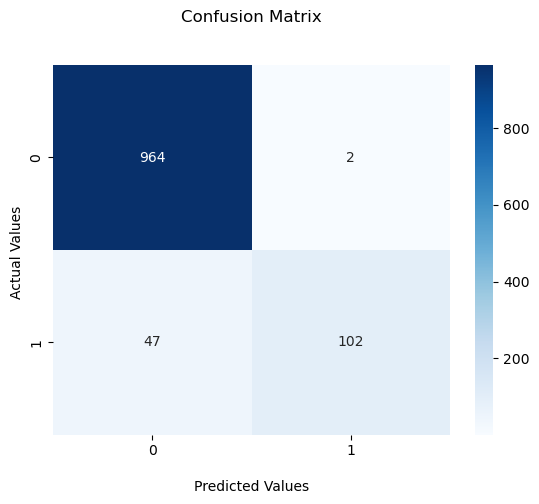

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_old, predictions_rf)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [38]:
feature_names = tfidf.get_feature_names_out()  

importances = model_rf.feature_importances_
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

print(importance_df.head(20))

              feature  importance
302       please call    0.030261
77         chance win    0.029285
334         send stop    0.028264
382          txt stop    0.025238
306            po box    0.024369
102  customer service    0.021783
103    dating service    0.019596
4           1000 cash    0.018860
81         claim call    0.018750
322        reply stop    0.017563
390        ur awarded    0.015523
148      gift voucher    0.014822
140         free text    0.014352
331  selected receive    0.013917
398            ur mob    0.012441
115         dont miss    0.012039
366         text stop    0.011901
61    call mobileupd8    0.011813
67       camera phone    0.011703
356         take part    0.011419


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

## Trenowanie Random forest tylko na features z importance > 0.001

In [41]:
model_rf_v2 = RandomForestClassifier()
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(estimator=model_rf_v2, threshold=0.001)),
    ('model', RandomForestClassifier())
])

In [42]:
pipeline.fit(X_train_old, y_train_old)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold=0.001)),
                ('model', RandomForestClassifier())])

In [43]:
predictions_rf_v2 = pipeline.predict(X_test_old)

In [44]:
print('Accuracy: ', accuracy_score(y_test_old, predictions_rf_v2))
print("Precision:", precision_score(y_test_old, predictions_rf_v2))
print("Recall:", recall_score(y_test_old, predictions_rf_v2))
print("F1_score:", f1_score(y_test_old, predictions_rf_v2))

Accuracy:  0.9560538116591928
Precision: 0.9807692307692307
Recall: 0.6845637583892618
F1_score: 0.8063241106719368


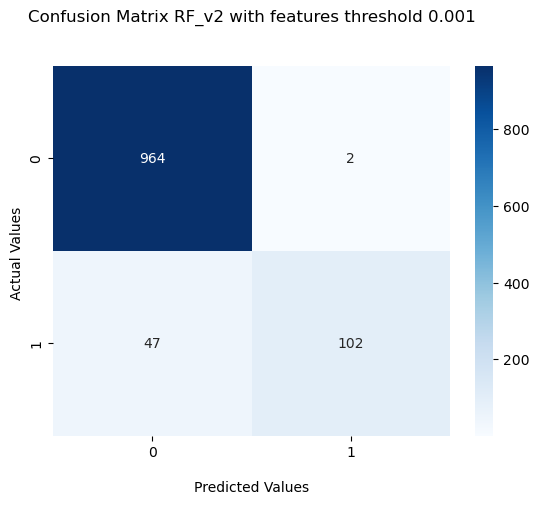

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_old, predictions_rf_v2)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix RF_v2 with features threshold 0.001\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

## Trenowanie Random forest z GridCV

In [47]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'feature_selection__threshold': [0.001, 0.005, 0.01]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_old, y_train_old)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [48]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Best parameters: {'feature_selection__threshold': 0.001, 'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best CV score: 0.9515


In [49]:
predictions_rf_v3 = grid_search.best_estimator_.predict(X_test_old)

In [50]:
print('Accuracy: ', accuracy_score(y_test_old, predictions_rf_v3))
print("Precision:", precision_score(y_test_old, predictions_rf_v3))
print("Recall:", recall_score(y_test_old, predictions_rf_v3))
print("F1_score:", f1_score(y_test_old, predictions_rf_v3))

Accuracy:  0.9551569506726457
Precision: 0.9714285714285714
Recall: 0.6845637583892618
F1_score: 0.8031496062992126


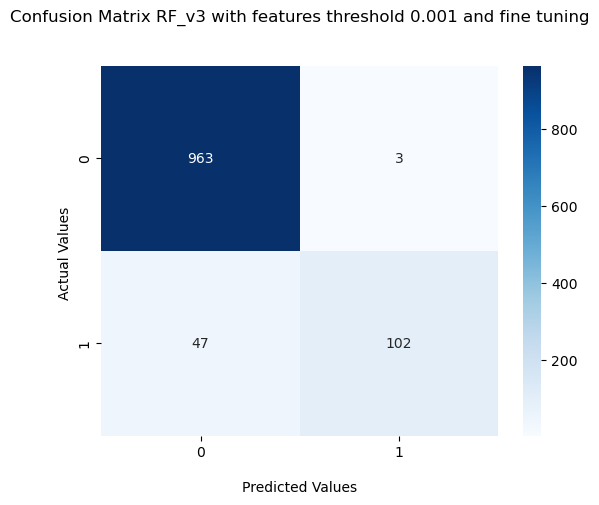

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_old, predictions_rf_v3)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix RF_v3 with features threshold 0.001 and fine tuning\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

### Wniosek: Fine Tuning Random forest tylko na parametrach random forest nicht przynosi porzadanych resultatow, dokladnosc modelu nie zmienila sie znaczaco

## Ponowna transformacja danych wejsciowych tym razem za pomoca TfidfVectorizer()

In [54]:
# Split the data first - use raw text data
X = spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x))
y = spam_dataset['Spam']  # Replace with your actual target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define complete pipeline with text vectorization
pipeline_v2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('feature_selection', SelectFromModel(estimator=model_rf_v2, threshold=0.001)),
    ('model', RandomForestClassifier())
])

# Define parameters for GridSearchCV including TF-IDF parameters
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__max_df': [0.3, 0.5, 0.7],
    'tfidf__min_df': [0.001, 0.01, 0.05],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

# Run GridSearchCV
grid_search_v2 = GridSearchCV(pipeline_v2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_v2.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search_v2.best_params_)

C:\Data_analysis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Data_analysis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Data_analysis\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Data_analysis\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X

Best parameters: {'model__max_depth': None, 'model__n_estimators': 100, 'tfidf__max_df': 0.5, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1)}


In [55]:
predictions_rf_v4 = grid_search_v2.best_estimator_.predict(X_test)

In [56]:
print('Accuracy: ', accuracy_score(y_test, predictions_rf_v4))
print("Precision:", precision_score(y_test, predictions_rf_v4))
print("Recall:", recall_score(y_test, predictions_rf_v4))
print("F1_score:", f1_score(y_test, predictions_rf_v4))

Accuracy:  0.9739910313901345
Precision: 0.9761904761904762
Recall: 0.825503355704698
F1_score: 0.8945454545454545


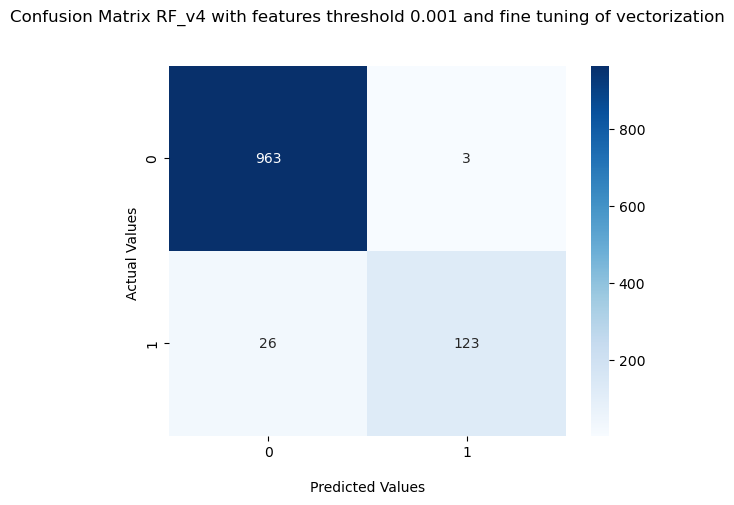

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_rf_v4)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix RF_v4 with features threshold 0.001 and fine tuning of vectorization\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

## Co przyniesie jesli uzyjemy innej wektoryzacji

### CountVectorizer() z GridCV na parametrach wektoryzacji

In [60]:
# Define complete pipeline with text vectorization
pipeline_v3 = Pipeline([
    ('count', CountVectorizer()),
    ('feature_selection', SelectFromModel(estimator=model_rf_v2, threshold=0.001)),
    ('model', RandomForestClassifier())
])

# Define parameters for GridSearchCV including TF-IDF parameters
param_grid = {
    'count__max_df': [0.3, 0.5, 0.7],
    'count__min_df': [0.001, 0.01, 0.05],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

# Run GridSearchCV
grid_search_v3 = GridSearchCV(pipeline_v3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_v3.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search_v3.best_params_)

Best parameters: {'count__max_df': 0.7, 'count__min_df': 0.001, 'model__max_depth': None, 'model__n_estimators': 200}


In [61]:
predictions_rf_v5 = grid_search_v3.best_estimator_.predict(X_test)

In [62]:
print('Accuracy: ', accuracy_score(y_test, predictions_rf_v5))
print("Precision:", precision_score(y_test, predictions_rf_v5))
print("Recall:", recall_score(y_test, predictions_rf_v5))
print("F1_score:", f1_score(y_test, predictions_rf_v5))

Accuracy:  0.9730941704035875
Precision: 0.9917355371900827
Recall: 0.8053691275167785
F1_score: 0.8888888888888888


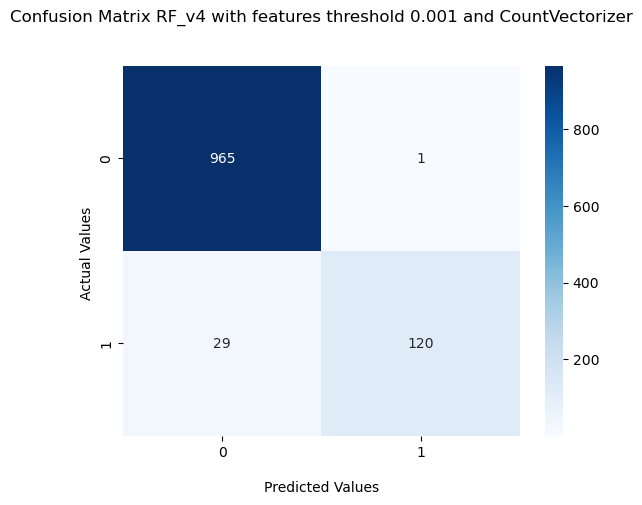

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_rf_v5)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix RF_v4 with features threshold 0.001 and CountVectorizer\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

## Porownanie wynikow roznych modeli

In [65]:
# Dictionary to store results
results = {}

# For each model you've trained
models = {
    'Random Forest bez feature importance': model_rf,
    'Random Forest z feature importance': model_rf_v2,
    'Random Forest (GridSearch)': grid_search.best_estimator_,
    'Random Forest (GridSearch + TfidfVectorizer() + changed Input)': grid_search_v2.best_estimator_,
    'Random Forest (GridSearch + CountVectorizer() + changed Input)': grid_search_v3.best_estimator_,
}

# Evaluate each model
for name, model in models.items():
    if name == 'Random Forest bez feature importance' or name == 'Random Forest (GridSearch)' :
        predictions = model.predict(X_test_old)
    elif name == 'Random Forest z feature importance':
        predictions = predictions_rf_v2
    else:
        predictions = model.predict(X_test)  # Use appropriate transformed data
        
    results[name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T

# Set display options to show full text
pd.set_option('display.max_colwidth', None)  # For column values
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Auto width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines
print(comparison_df)

                                                                Accuracy  Precision    Recall  F1 Score
Random Forest bez feature importance                            0.956054   0.980769  0.684564  0.806324
Random Forest z feature importance                              0.956054   0.980769  0.684564  0.806324
Random Forest (GridSearch)                                      0.955157   0.971429  0.684564  0.803150
Random Forest (GridSearch + TfidfVectorizer() + changed Input)  0.973991   0.976190  0.825503  0.894545
Random Forest (GridSearch + CountVectorizer() + changed Input)  0.973094   0.991736  0.805369  0.888889


Zmiana danych wejsciowych (inna WEKTORYZACJA tekstu) spowodowala poprawe czulosci modeli, teraz wykrywaja wiecej spamu, przy podobnej precyzji

## Porownienie wynikow w formie macierzy omylek

In [126]:
Y_TEST = y_test

# Predictions from different models
MODEL1_PREDS = predictions_rf  
MODEL2_PREDS = predictions_rf_v2  
MODEL3_PREDS = predictions_rf_v3  
MODEL4_PREDS = predictions_rf_v4  
MODEL5_PREDS = predictions_rf_v5  

# Names for your models
MODEL_NAMES = ['Random Forest bez feature importance', 'Random Forest z feature importance', 'Random Forest (GridSearch)', 'Random Forest (GridSearch + TfidfVectorizer() + changed Input)', 'Random Forest (GridSearch + CountVectorizer() + changed Input)']  # Replace with your model names

# Names for your classes (binary classification)
CLASS_NAMES = ['Negative', 'Positive']  # Replace with your class names



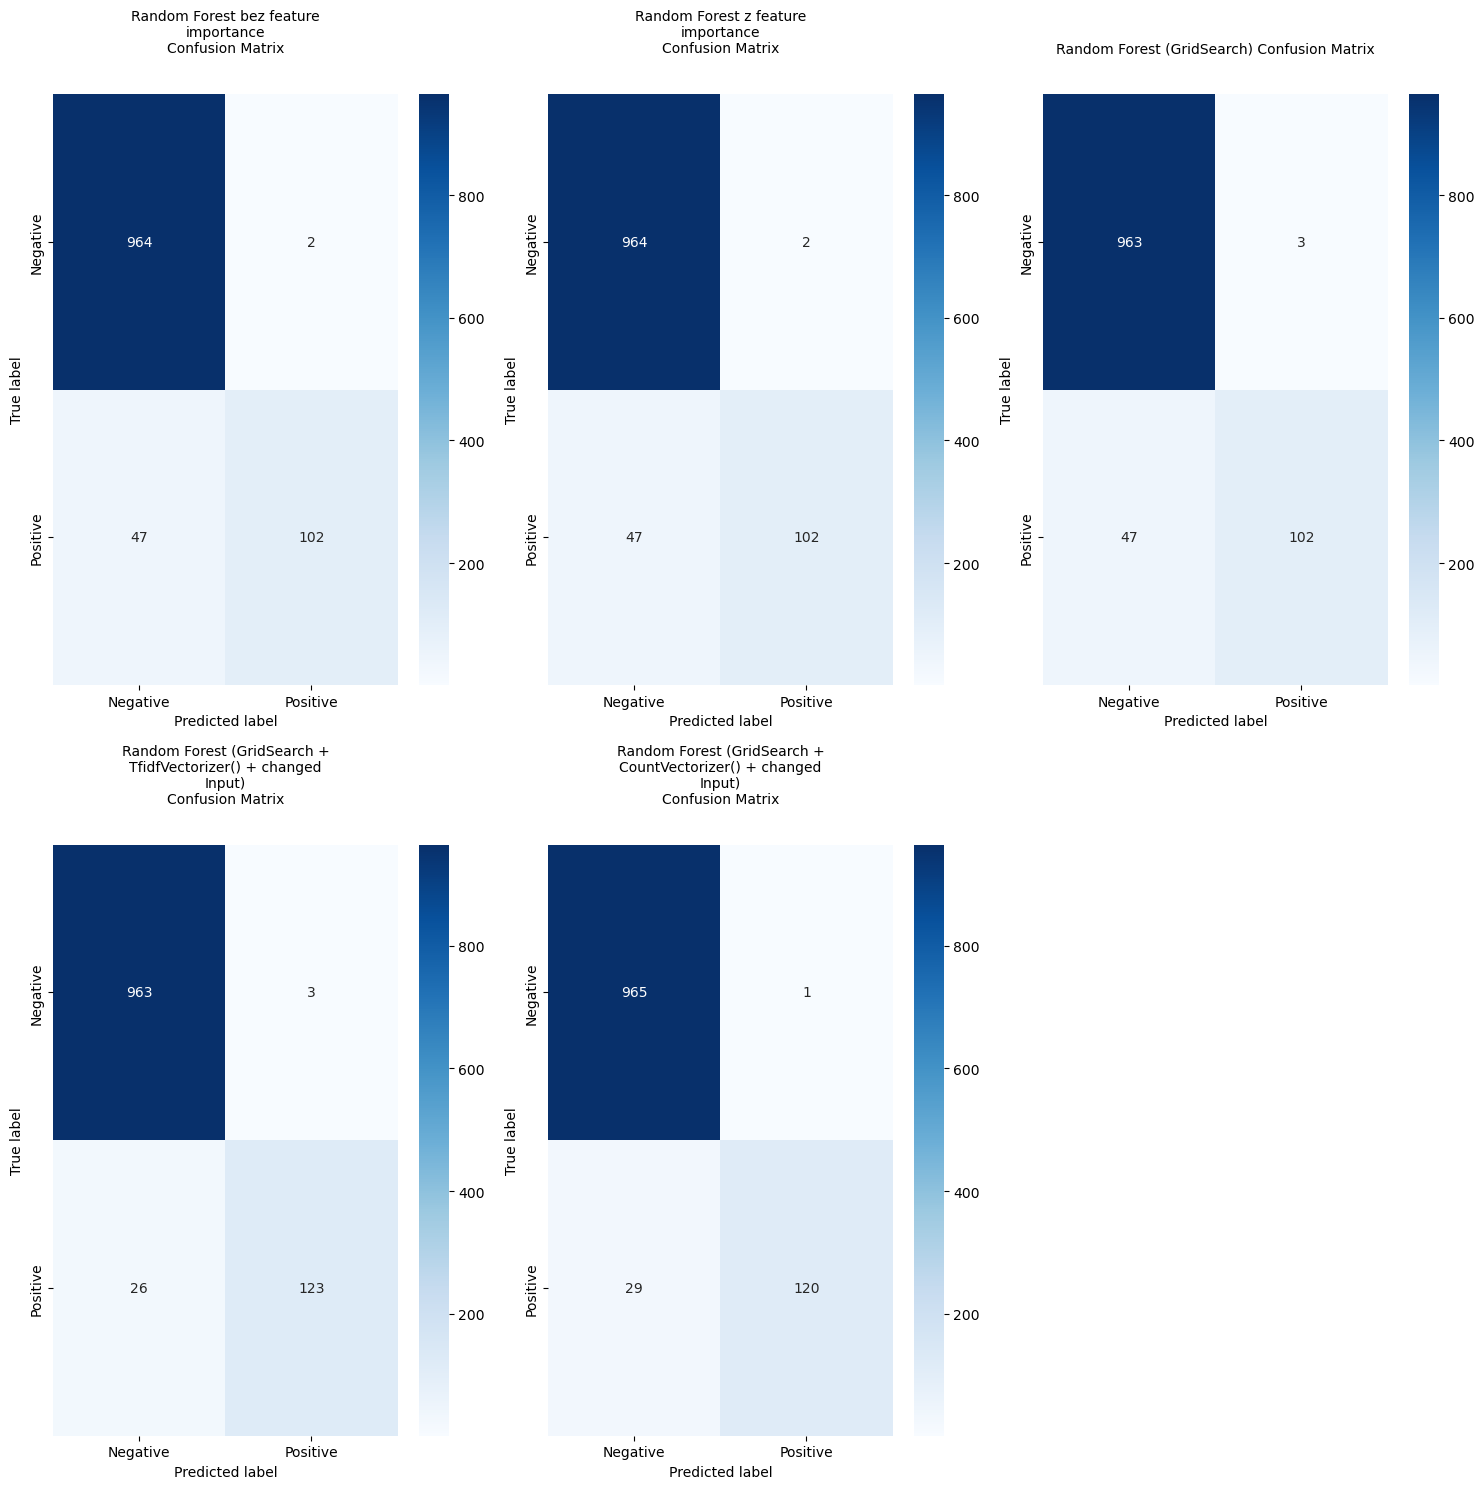

In [132]:
import math
# Figure settings
FIG_SIZE = (15, 15)  # Width, height in inches - increased height for titles
COLOR_MAP = 'Blues'  # Options: 'Blues', 'YlOrRd', 'Greens', etc.
NORMALIZE = False  # Set to False for raw counts
ANNOTATION_FORMAT = 'd'  # '.2f' for percentage, 'd' for integers
# ===================================

def compare_confusion_matrices(y_true_list, y_pred_list, model_names, class_names=None, figsize=(15, 12),
                              normalize=False, cmap='Blues', annot_format='d'):
    """
    Compare confusion matrices across multiple models in a grid layout.
    
    Parameters:
    -----------
    y_true_list : list of arrays
        List of true labels for each model
    y_pred_list : list of arrays
        List of predicted labels for each model
    model_names : list of str
        Names of the models being compared
    class_names : list of str, optional
        Names of the classes
    figsize : tuple, optional
        Figure size (width, height)
    normalize : bool, optional
        Whether to normalize the confusion matrix
    cmap : str, optional
        Colormap for the heatmap
    annot_format : str, optional
        Format string for annotations
        
    Returns:
    --------
    fig : matplotlib figure
        The figure with the confusion matrices
    """
    
    if len(y_true_list) != len(y_pred_list) or len(y_pred_list) != len(model_names):
        raise ValueError("Number of true labels, predicted labels, and model names must be the same")
    
    n_models = len(model_names)
    
    # Calculate grid layout dimensions
    n_cols = min(3, n_models)  # Max 3 columns
    n_rows = math.ceil(n_models / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    # Add much more space between plots for long titles
    plt.subplots_adjust(top=0.85, hspace=0.6)
    
    # Convert axes to flattened array for easy indexing
    if n_models > 1:
        if n_rows == 1 or n_cols == 1:
            axes = axes.reshape(-1)
        else:
            axes = axes.flatten()
    else:
        axes = [axes]
    
    # Compute all matrices to determine global min/max for consistent color scale
    matrices = []
    for y_true, y_pred in zip(y_true_list, y_pred_list):
        cm = confusion_matrix(y_true, y_pred)
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.nan_to_num(cm)  # Replace NaN with zero
        matrices.append(cm)
    
    vmin = min(matrix.min() for matrix in matrices)
    vmax = max(matrix.max() for matrix in matrices)
    
    # If no class names are provided, generate default ones
    if class_names is None:
        n_classes = matrices[0].shape[0]
        class_names = [f"Class {i}" for i in range(n_classes)]
    
    # Plot each confusion matrix
    for i, (matrix, model_name) in enumerate(zip(matrices, model_names)):
        if i < len(axes):
            ax = axes[i]
            df_cm = pd.DataFrame(matrix, index=class_names, columns=class_names)
            
            # Create heatmap
            sns.heatmap(df_cm, annot=True, fmt=annot_format, cmap=cmap, vmin=vmin, vmax=vmax,
                      cbar=True, ax=ax)
            
            # Create multiline titles for long model names
            title = f"{model_name}" + (" Normalized" if normalize else "") + " Confusion Matrix"
            # Break long titles into multiple lines (every ~30 chars)
            if len(model_name) > 30:
                words = model_name.split()
                lines = []
                current_line = []
                line_length = 0
                
                for word in words:
                    if line_length + len(word) + 1 <= 30 or not current_line:
                        current_line.append(word)
                        line_length += len(word) + 1
                    else:
                        lines.append(' '.join(current_line))
                        current_line = [word]
                        line_length = len(word)
                
                if current_line:
                    lines.append(' '.join(current_line))
                
                title = '\n'.join(lines) + (" Normalized" if normalize else "") + "\nConfusion Matrix"
            
            ax.set_title(title, pad=30, fontsize=10)
            ax.set_ylabel('True label')
            ax.set_xlabel('Predicted label')
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    return fig

# Main code to run
if __name__ == "__main__":
    # First ensure you've set your variables at the top
    if Y_TEST is None or MODEL1_PREDS is None:
        print("Please set your data variables at the top of the script")
    else:
        # Use the variables defined at the top
        y_preds = [MODEL1_PREDS, MODEL2_PREDS, MODEL3_PREDS, MODEL4_PREDS, MODEL5_PREDS]
        
        # Filter out None values
        valid_preds = []
        valid_names = []
        for pred, name in zip(y_preds, MODEL_NAMES):
            if pred is not None:
                valid_preds.append(pred)
                valid_names.append(name)
        
        fig = compare_confusion_matrices(
            [Y_TEST] * len(valid_names),  # Same ground truth for all models
            valid_preds,
            valid_names,
            class_names=CLASS_NAMES,
            figsize=FIG_SIZE,
            normalize=NORMALIZE,
            cmap=COLOR_MAP,
            annot_format=ANNOTATION_FORMAT
        )
        
        plt.show()